# Which customer Accepts Bank's Term Deposit?

![image](Images/bank_marketing.jpg)

## 1. Project Description

#### This project aims to predict whether a client will subscribe to a bank term deposit based on historical data from direct marketing campaigns conducted by a Portuguese banking institution. The dataset contains various attributes related to the clients' demographic information, banking history, and details about the marketing campaign.

#### The aim is to develop a classification model that can help the bank target potential customers more effectively, thereby increasing the success rate of their marketing campaigns.

## 2. Dataset Understanding

The dataset used for this project is `bank-full.csv`, [Download](https://archive.ics.uci.edu/dataset/222/bank+marketing), which contains data from direct marketing campaigns. The dataset consists of 17 input variables and one target variable `y`. The target variable `y` indicates whether a client has subscribed to a term deposit `yes` or not `no`.

* The dataset consists of 4521 records.
* the dataset does not have missing values

### 2.1. The variables/Features used for this project are:

1. `age` which is an integer
2. `job` which explains the type of job (categorical: `admin`,`blue-collar`,`entrepreneur`,`housemaid`,`management`,`retired`,`self-employed`,`services`,`student`,`technician`,`unemployed`,`unknown`)
3. `marital` which is marital status (categorical: `divorced`,`married`,`single`,`unknown`; note: 'divorced' means divorced or widowed)
4. `default` which explains if the customer has credit in default - Binary
5. `balance` which is the average yearly balance - Integer
6. `housing` which is if the customer has housing loan - binary
7. `loan` which is if the client has personal loan - binary
8. `campaign` which is the number of contacts performed during this campaign and for this client (numeric, includes last contact)
9. `poutcome` explains the outcome of the previous marketing campaign (categorical: `failure`,`nonexistent`,`success`)
10. `y` which is the target. has the client subscribed a term deposit?

## 3. Data Understanding and Preprocessing

### 3.1 Importing Libraries

In [1]:
# importing libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

### 3.2 Load dataset

In [2]:
# loading the dataset

# relevant columns
selected_columns = ['age', 'job', 'marital', 'default', 'balance', 'housing', 'loan', 'campaign', 'poutcome', 'y']

# Load the dataset
data = pd.read_csv('Data/bank-full.csv', delimiter=';', usecols=selected_columns)

# Display the first 5 rows of the dataframe
data.head()

,age,job,marital,default,balance,housing,loan,campaign,poutcome,y
0,58,management,married,no,2143,yes,no,1,unknown,no
1,44,technician,single,no,29,yes,no,1,unknown,no
2,33,entrepreneur,married,no,2,yes,yes,1,unknown,no
3,47,blue-collar,married,no,1506,yes,no,1,unknown,no
4,33,unknown,single,no,1,no,no,1,unknown,no


In [3]:
data.shape

(45211, 10)

* The dataset has `45211` data rows (instances). this is a large dataset for the training model and draw conclusions.
* The dataset has `10` columns as ststed above.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       45211 non-null  int64 
 1   job       45211 non-null  object
 2   marital   45211 non-null  object
 3   default   45211 non-null  object
 4   balance   45211 non-null  int64 
 5   housing   45211 non-null  object
 6   loan      45211 non-null  object
 7   campaign  45211 non-null  int64 
 8   poutcome  45211 non-null  object
 9   y         45211 non-null  object
dtypes: int64(3), object(7)
memory usage: 3.4+ MB


the dataset has no null values

### 3.3 Visualizing outcome distribution

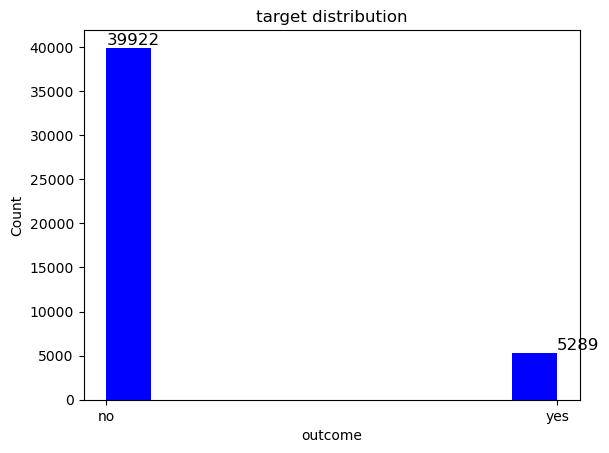

In [5]:
plt.hist(data.y, color='blue')
plt.title('target distribution')
plt.xlabel('outcome')
plt.ylabel('Count')

# Add value counts on top of the bars
value_counts = data['y'].value_counts()
for i, count in enumerate(value_counts):
    plt.text(i, count, str(count), va='bottom', fontsize=12)

plt.show()

From the distribution, the number of `yes` is 5289 which is 11.7% of the whole dataset. Meaning the data is highly imbalanced to the `no` outcomes and a model can be 89% right by classifying all as `no` which will not be a good outcome.

We will apply `SMOTE` from `imblearn` module to handle the class imbalance

### 3.4 Visualizing the age distibution of the clients

C:\Users\Floyed\AppData\Local\Temp\ipykernel_16360\3805640322.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.age, color='blue')


<Axes: xlabel='age', ylabel='Density'>

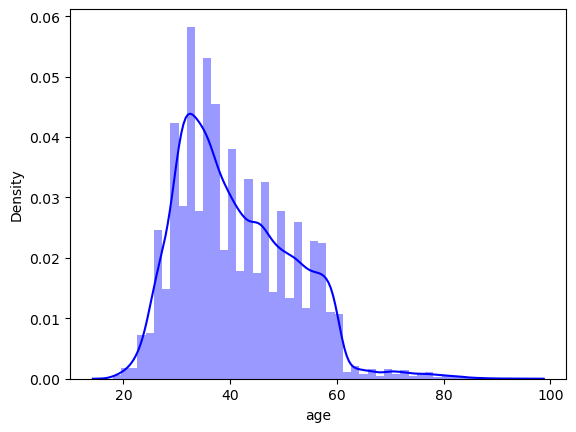

In [6]:
sns.distplot(data.age, color='blue')

The age distribution takes almost normal distribution from 20-100 years. The normal distribution is good for study as we can study the rate of subscription on age brackets leading to a more detailed conclusions and marketing startegy.

### 3.5 distribution of job categories

Study of Job categories helps study which job categories have a high rate of subscription to the bank deposit terms.

In [10]:
jobs= pd.crosstab(data['job'], data['y'])
jobs['rate'] = jobs['yes'] / (jobs['yes'] + jobs['no'])
jobs

y,no,yes,rate
job,,,
admin.,4540,631,0.122027
blue-collar,9024,708,0.072750
entrepreneur,1364,123,0.082717
housemaid,1131,109,0.087903
management,8157,1301,0.137556
retired,1748,516,0.227915
self-employed,1392,187,0.118429
services,3785,369,0.088830
student,669,269,0.286780


<Axes: xlabel='job'>

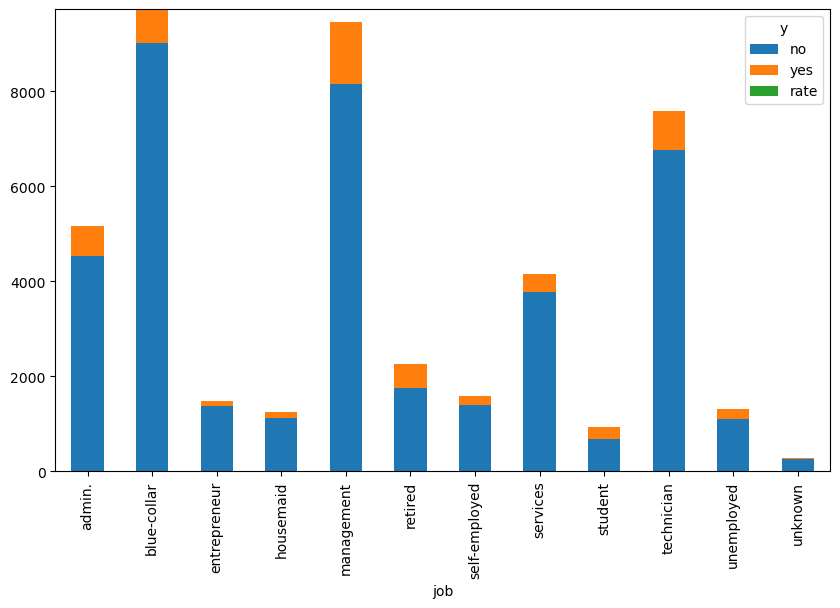

In [11]:
jobs.plot.bar(stacked=True, figsize=(10,6))

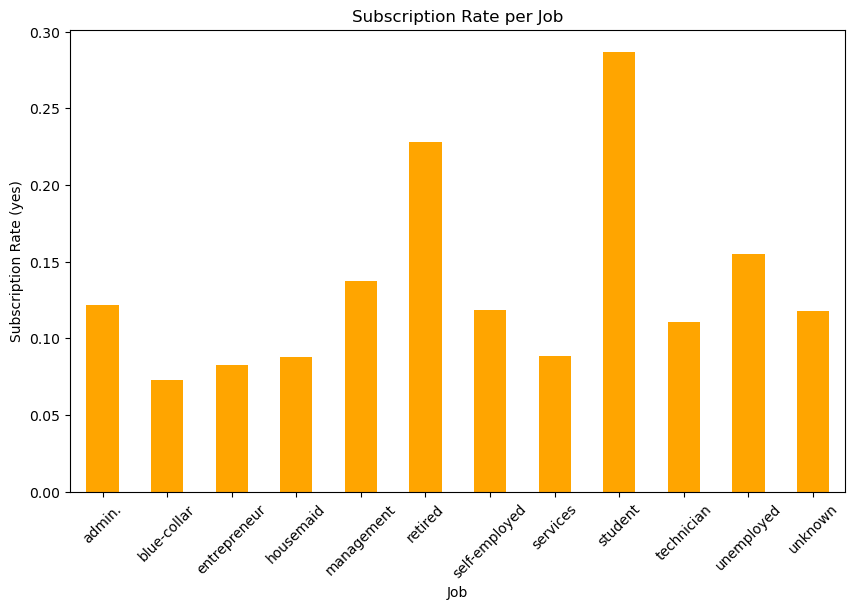

In [13]:
subscription_rate = data.groupby('job')['y'].value_counts(normalize=True).unstack()

plt.figure(figsize=(10, 6))
subscription_rate['yes'].plot(kind='bar', color='orange')
plt.title('Subscription Rate per Job')
plt.xlabel('Job')
plt.ylabel('Subscription Rate (yes)')
plt.xticks(rotation=45)
plt.show()

from the job distribution against rate of acceptance  we can infer:
* `Students` have the highest rate of suscription in the dataset of averagely `0.28` this may be fueled by the fact that students do not have many financial responsibilities.
* Its followed by `Retired` people who have average of `0.23`, this may be due to the pension payments where they are willing to invest in bank term deposits to earn interests.

### 3.6 How marital stsus relates to accepting the bank deposit terms

In [15]:
marital = pd.crosstab(data['marital'], data['y'])
marital['Rate'] = marital['yes']/(marital['yes'] + marital['no'])
marital

y,no,yes,Rate
marital,,,
divorced,4585,622,0.119455
married,24459,2755,0.101235
single,10878,1912,0.149492


<Axes: xlabel='marital'>

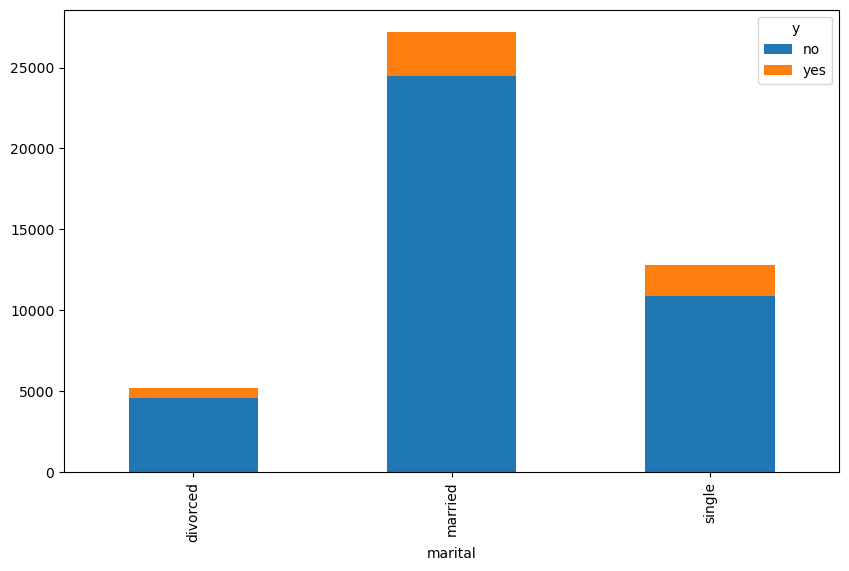

In [12]:
marital.plot.bar(stacked=True, figsize=(10, 6))

Drom the visualization we infer that:
* `Single` individuals have the highest rate on subscription to the term deposits. This may be due to few financial responsibilities as well as saving for their future or invetsments
* this is followed by `divorced`, then `married` people, this could be due to increasing levels of financial responsibilities or demands.

### 3.7 How outcome of former campaigns outcome relates to the subscription rate

In [16]:
poutcome = pd.crosstab(data['poutcome'], data['y'])
poutcome['rate'] = poutcome['yes'] / (poutcome['yes'] + poutcome['no'])
poutcome

y,no,yes,rate
poutcome,,,
failure,4283,618,0.126097
other,1533,307,0.166848
success,533,978,0.647253
unknown,33573,3386,0.091615


<Axes: xlabel='poutcome'>

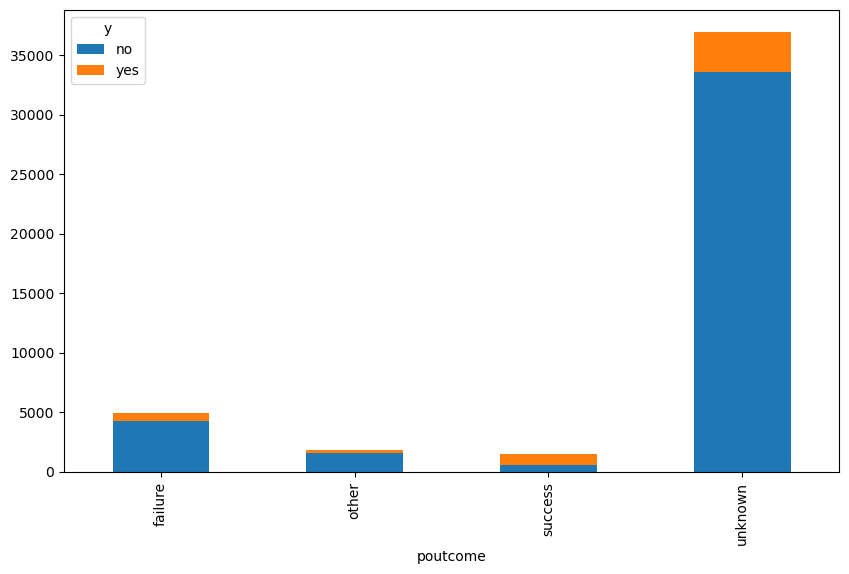

In [14]:
poutcome.plot.bar(stacked=True, figsize=(10,6))

From this analysis, we observe that:
* If a customer has previously subscribed to the bank term deposit, they have a high probability of accepting a new deposit terms. This couls be because they already know the benefits and are willing to keep investing. A small number of people in this category were involved but showed a high subscription rate.
* Customers who have not previously subscribed or whose status is unknown have a low subscription rate. The bank should focus on explaining the deposit terms to win customers.

### 3.8 How the Number of previous campaigns relate to rate of subscription

In [15]:
campaigns = pd.crosstab(data['campaign'], data['y'])
campaigns

y,no,yes
campaign,,
1,14983,2561
2,11104,1401
3,4903,618
4,3205,317
5,1625,139
6,1199,92
7,688,47
8,508,32
9,306,21


From the data, we infer that:
* Involving a customer many times does not lead to the customer accepting the bank terms
* The bank should balance between 1- 5 times which shows a high acceptance rate to avoid over-nagging the customer

### 3.9 Does having a bank loan or defaulted loan affect acceptance rate?

In [17]:
default = pd.crosstab(data['default'], data['y'])

# Calculate the acceptance rate (the percentage of "yes" subscriptions)
default['acceptance_rate'] = default['yes'] / (default['yes'] + default['no'])

default

y,no,yes,acceptance_rate
default,,,
no,39159,5237,0.117961
yes,763,52,0.063804


The data shows that having customers who have defaulted bank loan do not easily subscribe to bank deposit term. This is understandable because defaulting means the client could be going through financial challenges.

In [18]:
loan = pd.crosstab(data.loan, data.y)

# Calculate the acceptance rate (the percentage of "yes" subscriptions)
loan['acceptance_rate'] = loan['yes'] / (loan['yes'] + loan['no'])

loan

y,no,yes,acceptance_rate
loan,,,
no,33162,4805,0.126557
yes,6760,484,0.066814


Its also clear that clients with an existsing bank loan do not accept term deposits easily. This could be due to challenges in settling the loans among other challenges.

### 3. 10 Yealy balance effect on subscription 

check the minimum and maximum balances

In [58]:
min_bal = data['balance'].min()
max_bal = data['balance'].max()

print(f''' minimum balance is {min_bal} and maximum balance is {max_bal}''')

 minimum balance is -8019 and maximum balance is 102127


create balance classes to check the rate of sunscription per class

In [66]:
# Define balance bins
bins = list(range(-10000, int(max_bal), 10000))
labels = [f"{bins[i]}-{bins[i+1]}" for i in range(len(bins)-1)]

# Create balance classes
data1 = data.copy()
data1['balance_class'] = pd.cut(data1['balance'], bins=bins, labels=labels, include_lowest=True)

data1[['balance', 'balance_class']].head()

,balance,balance_class
0,2143,0-10000
1,29,0-10000
2,2,0-10000
3,1506,0-10000
4,1,0-10000


calculate the acceptance rate per balance class

In [67]:
# Cross-tabulation of acceptance rates by balance class
balance_acceptance_ct = pd.crosstab(data1['balance_class'], data1['y'], normalize='index') * 100

# Rename columns for better understanding
#balance_acceptance_ct.columns = ['No Subscription Rate (%)', 'Subscription Rate (%)']

balance_acceptance_ct


y,no,yes
balance_class,,
-10000-0,93.104396,6.895604
0-10000,87.461592,12.538408
10000-20000,83.333333,16.666667
20000-30000,85.815603,14.184397
30000-40000,83.333333,16.666667
40000-50000,90.000000,10.000000
50000-60000,80.000000,20.000000
60000-70000,100.000000,0.000000
70000-80000,100.000000,0.000000


<Axes: xlabel='balance_class'>

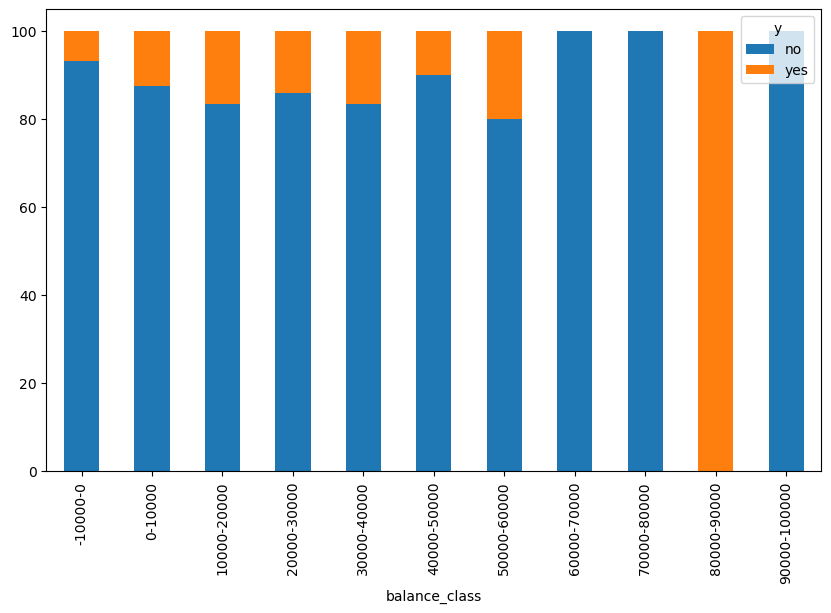

In [69]:
balance_acceptance_ct.plot.bar(stacked=True, figsize=(10, 6))

the yearly balances affect the results of bank term acceptance rate
* Less or negative balances individuals have low acceptance rate
* `60000-80000` and `90000-100000` yearly balanced class do not accept the bank offers.
* The class of `80000-90000` class easily accept the bank deposits- all the individuals in the class from the dataset accepted the offer.

## 4 Target and features splitting

### 4.1 features and target

In [19]:
# Define features and target
X = data.drop('y', axis=1)
y = data['y']

### 4.2 test-train split

In [21]:
# Split the data with the test size of 20% and a random state of 42 using the train_test_split module 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 4.3 One Hot Encoding

In [22]:
# Encoding categorical variables
categorical_cols = ['job', 'marital', 'default', 'housing', 'loan', 'poutcome']

X_train_encoded = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, columns=categorical_cols, drop_first=True)

### 4.4 Apply smote to handle the class imbalance

SMOTE is an oversampling technique where the synthetic samples are generated for the minority class

In [23]:
# Apply SMOTE for class imbalance

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_encoded, y_train)

### 4.5 Scaling Numerical Features

In [24]:
# Scaling numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test_encoded)

## 5 Modelling

## 5.1 Baseline Model - Logistic Regression

Logistic Regression is a good starting point as a baseline model due to its simplicity and interpretability.

In [25]:
# Initialize and train the Logistic Regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train_resampled)

# Make predictions
y_pred_log_reg = log_reg.predict(X_test_scaled)

### 5.1.1 Baseline Model evaluation

In [26]:
# Evaluate the model
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log_reg))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_log_reg))
print("ROC AUC Score:", roc_auc_score(y_test, log_reg.predict_proba(X_test_scaled)[:, 1]))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

          no       0.91      0.88      0.89      7952
         yes       0.27      0.33      0.30      1091

    accuracy                           0.81      9043
   macro avg       0.59      0.60      0.60      9043
weighted avg       0.83      0.81      0.82      9043

Confusion Matrix:
[[6998  954]
 [ 732  359]]
ROC AUC Score: 0.6856655515125585


### baseline model evaluation


Precision:
* No: 0.91
* Yes: 0.27
    * The model is highly accurate at predicting `no` outcomes (91%) but performs poorly for `yes` outcomes (27%). This indicates that the model is not effective at identifying positive cases.


Recall
* No: 0.88
* Yes: 0.33
    * The model is better at identifying `no` outcomes (88%) but only identifies 33% of the 'yes' outcomes. This suggests that the model is missing a lot of the positive cases.

* The model has a high F1-score for `no` (0.89) but a very low F1-score for `yes` (0.30), which indicates that the model's performance is significantly weaker for predicting the 'yes' class.

* The accuracy of the model is 81%, which seems high. However, due to the class imbalance (more `no` outcomes), accuracy can be misleading. A model could achieve high accuracy by simply predicting the majority class `no`.

#### Confusion Matrix
The confusion matrix confirms that the model has a high number of false positives and false negatives. This contributes to the poor recall and precision for the `yes` class.

#### ROC AUC Score
* A score of 0.68 indicates that the model has some discriminative power but is not performing very well.
* A score closer to 1.0 would indicate a better model.

## 5.2 Advanced model - Decision Tree

Decision tree calssifier is a complex model and fit for non-liniear relationships

In [48]:
#Innitialize the model

decision_tree = DecisionTreeClassifier(max_depth=3, min_samples_split=3, criterion='entropy', random_state=42)

In [49]:
# Train the Decision Tree

decision_tree.fit(X_train_scaled, y_train_resampled)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=3,
                       random_state=42)

In [50]:
#make predictions

y_pred = decision_tree.predict(X_test_scaled)

### 5.2.1 decision tree Model Evaluation

In [51]:
# Evaluate the model's performance
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred))

Decision Tree Classification Report:
              precision    recall  f1-score   support

          no       0.91      0.73      0.81      7952
         yes       0.20      0.50      0.29      1091

    accuracy                           0.70      9043
   macro avg       0.56      0.61      0.55      9043
weighted avg       0.83      0.70      0.75      9043



In [52]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[5780 2172]
 [ 544  547]]


In [53]:
roc_auc = roc_auc_score(y_test, decision_tree.predict_proba(X_test_scaled)[:, 1])
print(f"ROC AUC Score: {roc_auc}")

ROC AUC Score: 0.6636212785420129


### 5.2.2 Analysis and conclusions

#### Precision:

No: 0.91 this is a high precision; indicating that when the model predicts "no" mostly correctly
Yes: 0.20 this is a low precision; indicating that when the model predicts "yes" often incorrectly

#### Recall:

No: 0.73 means that the model correctly identifies 87% of the "no" cases
Yes: 0.50 means that the model correctly identifies 32% of the "yes" cases

#### Accuracy
0.70 overall, 70% of the predictions are correct

#### ROC AUC Score: 0.663
This model is performing quite well in distinguishing between the two classes. higher than that of logistic model

## Conclusions

![image](Images/perfomance.jpg)

#### Improved Recall and F1-Score:
The Decision Tree model shows a slight improvement in recall and F1-score for the "yes" class compared to the Logistic Regression model. This suggests that the Decision Tree is better at identifying the "yes" cases (true positives) than Logistic Regression.

#### Higher ROC AUC Score:
The logistic model has a higher ROC AUC score than the Decision tree model. This indicates better overall performance in distinguishing between the "yes" and "no" classes.

## Findings and Recommendations

### To increase the acceptance rate, the bank should focus on Targeting:
1. Individuals who have lower financial responsibilities such as students, retired or divorced not neglecting the others such as admin and management job categories
2. Individuals who have a yearly bank balance of $80,000 - $90,000 and more campaigns on $10,000 - $60,000
3. Those Who do not have an existing bank loan or have not defaulted on the loan not neglecting others as there can be success still
4. Only doing 1-5 campaigns per customer
5. Those who have an existing or previously subscribed to deposit terms
6. A logistic model and Decision tree can be used to model so as to predict the rate of acceptance, Though a more balanced dataset should be used for training the models

## Analysis prepared by `Floyed Muchiri`, Floyedmuchiri@gmail.com ##